In [48]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D

In [49]:
# Set font for Matplotlib
plt.rc('font', family='NanumGothic') # For Windows
print(plt.rcParams['font.family'])

['NanumGothic']


In [50]:
# Load data
raw_data = pd.read_excel("./data/231222_최종.xlsx")

raw_data.columns = ["ID", "Attendance", "Level", "Quater_paid", "Combatpower", "dungeonplay"]

In [51]:
# Fill missing values
raw_data.fillna(0, inplace = True)

In [52]:
# Check for missing values
raw_data.isnull().sum()

ID             0
Attendance     0
Level          0
Quater_paid    0
Combatpower    0
dungeonplay    0
dtype: int64

In [53]:
# Inspect data
raw_data.head()

,ID,Attendance,Level,Quater_paid,Combatpower,dungeonplay
0,1,9,0.0,9000.0,71066.0,0.0
1,2,1,0.0,0.0,0.0,0.0
2,3,3,221.0,0.0,3280363.0,0.0
3,4,1,0.0,0.0,1703.0,0.0
4,5,1,0.0,0.0,5718.0,3.0


In [54]:
# Check data dimensions
raw_data.shape

(41708, 6)

In [55]:
# Check data types in the DataFrame
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41708 entries, 0 to 41707
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           41708 non-null  int64  
 1   Attendance   41708 non-null  int64  
 2   Level        41708 non-null  float64
 3   Quater_paid  41708 non-null  float64
 4   Combatpower  41708 non-null  float64
 5   dungeonplay  41708 non-null  float64
dtypes: float64(4), int64(2)
memory usage: 1.9 MB


In [56]:
# Remove columns where the level is -1
cond2 = (raw_data["Level"] != -1)

data = raw_data[cond2]

In [57]:
data.shape

(40454, 6)

In [58]:
# Define three columns
Attendance = np.array(data["Attendance"])
Level = np.array(data["Level"])
Quater_paid = np.array(data["Quater_paid"])
Combatpower = np.array(data["Combatpower"])
dungeonplay = np.array(data["dungeonplay"])

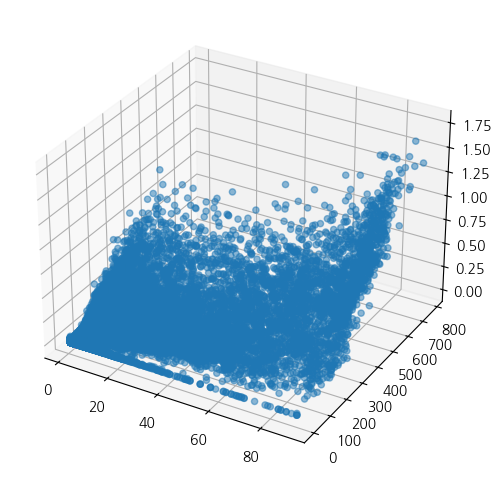

In [59]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(Attendance, Level, Combatpower, s=20, alpha=0.5)

plt.show()

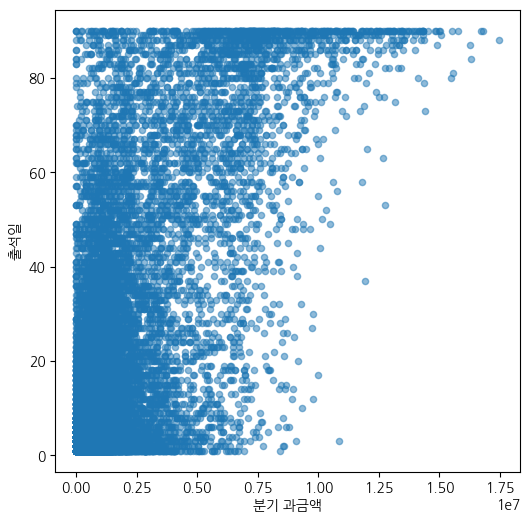

In [60]:
fig = plt.figure(figsize=(6, 6))

plt.scatter(Combatpower, Attendance, s=20, alpha=0.5)
plt.xlabel("분기 과금액")
plt.ylabel("출석일")
plt.show()

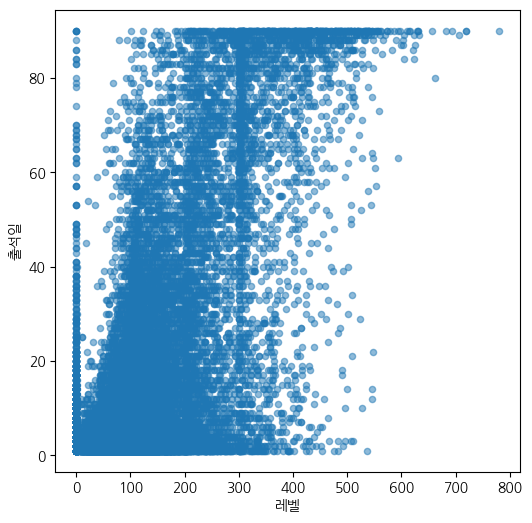

In [61]:
fig = plt.figure(figsize=(6, 6))

plt.scatter(Level, Attendance, s=20, alpha=0.5)
plt.xlabel("레벨")
plt.ylabel("출석일")
plt.show()

Clustering

In [62]:
ml_data = data[["Level", "Attendance", "Combatpower"]]

In [ ]:
from sklearn.cluster import MiniBatchKMeans

# Set the number of clusters
K = 3

# Define the model
model = MiniBatchKMeans(n_clusters=K, random_state=1)

model.fit(ml_data)
ml_data["Cluster"] = model.fit_predict(ml_data)

In [64]:
centers = model.cluster_centers_

In [65]:
clustered_0_level = ml_data[ml_data["Cluster"] == 0]["Level"]
clustered_0_attendance = ml_data[ml_data["Cluster"] == 0]["Attendance"]
clustered_0_combatpower = ml_data[ml_data["Cluster"] == 0]["Combatpower"]
clustered_0 = pd.DataFrame({"Level":clustered_0_level, "Attendance":clustered_0_attendance, "Combatpower":clustered_0_combatpower, "Cluster":0}).reset_index(drop=True)

clustered_1_level = ml_data[ml_data["Cluster"] == 1]["Level"]
clustered_1_attendance = ml_data[ml_data["Cluster"] == 1]["Attendance"]
clustered_1_combatpower = ml_data[ml_data["Cluster"] == 1]["Combatpower"]
clustered_1 = pd.DataFrame({"Level":clustered_1_level, "Attendance":clustered_1_attendance, "Combatpower":clustered_1_combatpower, "Cluster":1}).reset_index(drop=True)

clustered_2_level = ml_data[ml_data["Cluster"] == 2]["Level"]
clustered_2_attendance = ml_data[ml_data["Cluster"] == 2]["Attendance"]
clustered_2_combatpower = ml_data[ml_data["Cluster"] == 2]["Combatpower"]
clustered_2 = pd.DataFrame({"Level":clustered_2_level, "Attendance":clustered_2_attendance, "Combatpower":clustered_2_combatpower, "Cluster":2}).reset_index(drop=True)

clustered_data = pd.concat([clustered_0, clustered_1, clustered_2], axis = 0)

In [66]:
center_data = pd.DataFrame({"x":centers[:, 0], "y":centers[:, 1], "z":centers[:, 2], "Cluster":[0, 1, 2]})

In [67]:
center_data

,x,y,z,Cluster
0,58.745220,7.467031,3.774985e+05,0
1,276.460575,45.241710,4.500883e+06,1
2,432.727027,74.786486,9.334729e+06,2


In [79]:
import plotly.express as px
import plotly.graph_objects as go


trace1 = go.Scatter3d(x = clustered_1_level, y = clustered_1_attendance, z = clustered_1_combatpower, mode = "markers", marker_opacity = 0.6, marker = dict(size = 5, color = "#EAF2F8"))
trace2 = go.Scatter3d(x = clustered_2_level, y = clustered_2_attendance, z = clustered_2_combatpower, mode = "markers", marker_opacity = 0.6, marker = dict(size = 5, color = "#EAFAF1"))
trace0 = go.Scatter3d(x = clustered_0_level, y = clustered_0_attendance, z = clustered_0_combatpower, mode = "markers", marker_opacity = 0.6, marker = dict(size = 5, color = "#F2F4F4"))
trace_center = go.Scatter3d(x = center_data["x"], y = center_data["y"], z = center_data["z"], mode = "markers", marker = dict(size = 10, color = "#CB4335"))

fig = go.Figure(data = [trace0, trace1, trace2, trace_center])

fig.show()

In [ ]:
# import plotly.express as px
# import plotly.graph_objects as go

# fig = px.scatter_3d(clustered_data, x = "Level", y = "Attendance", z = "Combatpower", color = "Cluster")

# fig.show()

In [ ]:
# fig = plt.figure(figsize=(6, 6))
# ax = fig.add_subplot(111, projection='3d')

# ax.scatter(clustered_0_attendance, clustered_0_combatpower, clustered_0_level, s=20, alpha=0.5)
# ax.scatter(clustered_1_attendance, clustered_1_combatpower, clustered_1_level, s=20, alpha=0.5)
# ax.scatter(clustered_2_attendance, clustered_2_combatpower, clustered_2_level, s=20, alpha=0.5)

# for idx in range(len(centers)):
#     ax.scatter(centers[idx][1], centers[idx][2], centers[idx][0], color = "red")

# plt.show()

In [ ]:
centers

In [ ]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)

ax.scatter(clustered_0_level, clustered_0_attendance, s=20, alpha=0.5)
ax.scatter(clustered_1_level, clustered_1_attendance, s=20, alpha=0.5)
ax.scatter(clustered_2_level, clustered_2_attendance, s=20, alpha=0.5)


for idx in range(len(centers)):
    ax.scatter(centers[idx][0], centers[idx][1], marker='o', color = "red")

plt.show()

In [ ]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)

ax.scatter(clustered_0_attendance, clustered_0_combatpower, s=20, alpha=0.5)
ax.scatter(clustered_1_attendance, clustered_1_combatpower, s=20, alpha=0.5)
ax.scatter(clustered_2_attendance, clustered_2_combatpower, s=20, alpha=0.5)


for idx in range(len(centers)):
    ax.scatter(centers[idx][1], centers[idx][2], marker='o', color = "red")

plt.show()

In [ ]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)

ax.scatter(clustered_0_level, clustered_0_combatpower, s=20, alpha=0.5)
ax.scatter(clustered_1_level, clustered_1_combatpower, s=20, alpha=0.5)
ax.scatter(clustered_2_level, clustered_2_combatpower, s=20, alpha=0.5)


for idx in range(len(centers)):
    ax.scatter(centers[idx][0], centers[idx][2], marker='o', color = "red")

plt.show()